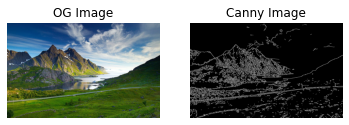

In [1]:
# Canny Edge Detection

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("scenery.jpg")
img1 = cv2.Canny(img,200,300)

plt.subplot(121),
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('OG Image'),
plt.axis('off')
plt.subplot(122),
plt.imshow(img1,cmap = 'gray')
plt.title('Canny Image'), 
plt.axis('off')
plt.show()

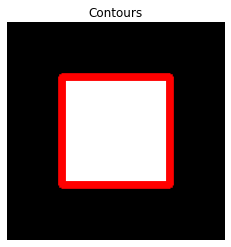

In [2]:
#Contours demo

import cv2
import numpy as np
img = np.zeros((200,200), dtype=np.uint8)
img[50:150,50:150] = 255
ret,thres = cv2.threshold(img,27,255,0)
contours,hry =cv2.findContours(thres,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
color=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color,contours,-1,(0,0,255),5)

plt.subplot(111),
plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
plt.title('Contours'),
plt.axis('off')
plt.show()

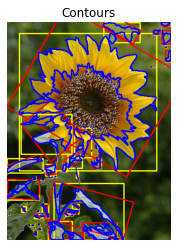

In [3]:
#Contours on an image

import cv2
import numpy as np
img = cv2.pyrDown(cv2.imread("sunflower.jpg",cv2.IMREAD_UNCHANGED))
ret,thres = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) ,127,255,cv2.THRESH_BINARY)
contours,hry =cv2.findContours(thres,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img,[box],0,(0,0,255),2)
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)    
img1 = cv2.circle(img,center,radius,(0,0,255),2)
cv2.drawContours(img,contours,-1,(255,0,0),2)

plt.subplot(111),
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours'),
plt.axis('off')
plt.show()

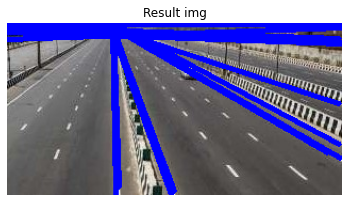

In [4]:
# HoughLines

import cv2
import numpy as np
img = cv2.imread("highway.jpeg",cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,200)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=15,maxLineGap=250)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),3)

plt.subplot(111),
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Result img'),
plt.axis('off')
plt.show()

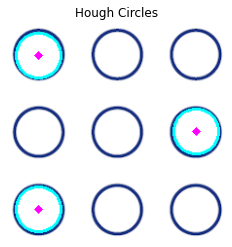

In [5]:
#Hough Circles

import cv2
import numpy as np
circ = cv2.imread("circles.png")
gray = cv2.cvtColor(circ,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray,5)
color = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
hc=cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                   param1=100,
                   param2=40,
                   minRadius=0,
                   maxRadius=0)
hc = np.uint16(np.around(hc))
for i in hc[0,:]:
    cv2.circle(circ,(i[0],i[1]),i[2],(255,255,0),2)
    cv2.circle(circ,(i[0],i[1]),2,(255,0,255),3)
cv2.imwrite("new_circles.jpg",circ)

plt.subplot(111),
plt.imshow(cv2.cvtColor(circ, cv2.COLOR_BGR2RGB))
plt.title('Hough Circles'),
plt.axis('off')
plt.show()